In [1]:
def policy(env,pt):
    i=pt[0]
    j=pt[1]
    _env=env.copy()
    _env[1,1]=-np.inf
    #_acts=[]
    #for i in range(_env.shape[0]):
    #  for j in range(_env.shape[1]):
    if i-1>=0: u=_env[i-1,j] 
    else: u=-np.inf#np.nan
    if i+1<h: d=_env[i+1,j]
    else: d=-np.inf#np.nan 
    if j-1>=0: l=_env[i,j-1]
    else: l=-np.inf#np.nan
    if j+1<w: r=_env[i,j+1]
    else: r=-np.inf#np.nan

    act_list=np.array([u,d,l,r])
    _act=np.argmax(act_list)
    #print(i,j,"...",u,d,l,r,'..')
    return _act
#acts=policy(env)
#print(acts)

In [2]:

def step(env,pt,act,rw):
    reward=rw
    gamma=0.9
    prob_a=0.8
    prob_b=0.1
    prob_c=0.1
    val=0
    i=pt[0]
    j=pt[1]
    if act ==0:#up / left , right
        if i-1>=0 :
            if not np.isnan(env[i-1,j]) : val=reward+gamma*0.8*env[i-1,j]#up
        else : val=reward+gamma*0.8*env[i,j]#up
        if j-1>=0 :
            if not np.isnan(env[i,j-1]) :val+=reward+gamma*0.1*env[i,j-1]#left
        else : val+=reward+gamma*0.1*env[i,j]#left
        if j+1 <w :
            if not np.isnan(env[i,j+1]) :val+=reward+gamma*0.1*env[i,j+1]#right
        else : val+=reward+gamma*0.1*env[i,j]#right
            
    if act ==1:#up / left , right
        if i+1<h :
            if not np.isnan(env[i+1,j]): val=reward+gamma*0.8*env[i+1,j]#up
        else : val=reward+gamma*0.8*env[i,j]#up
        if j-1>=0 :
            if not np.isnan(env[i,j-1]): val+=reward+gamma*0.1*env[i,j-1]#left
        else : val+=reward+gamma*0.1*env[i,j]#left
        if j+1 <w :
            if not np.isnan(env[i,j+1]): val+=reward+gamma*0.1*env[i,j+1]#right
        else : val+=reward+gamma*0.1*env[i,j]#right
            
    if act ==2:#up / left , right
        if j-1 >=0 :
            if not np.isnan(env[i,j-1]) : val=reward+gamma*0.8*env[i,j-1]#l
        else : val=reward+gamma*0.8*env[i,j]#l
        if i-1>=0 :
            if not np.isnan(env[i-1,j]) : val+=reward+gamma*0.1*env[i-1,j]#u
        else : val+=reward+gamma*0.1*env[i,j]#u
        if i+1<h :
            if not np.isnan(env[i+1,j]): val+=reward+gamma*0.1*env[i+1,j]#d
        else: val+=reward+gamma*0.1*env[i,j]#d
            
    if act ==3:#up / left , right
        if j+1 <w :
            if not np.isnan(env[i,j+1]) :val=reward+gamma*0.8*env[i,j+1]#r
        else : val=reward+gamma*0.8*env[i,j]#l
        if i-1>=0 :
            if not np.isnan(env[i-1,j]) : val+=reward+gamma*0.1*env[i-1,j]#u
        else : val+=reward+gamma*0.1*env[i,j]#u
        if i+1<h :
            if not np.isnan(env[i+1,j]) : val+=reward+gamma*0.1*env[i+1,j]#d
        else : val+=reward+gamma*0.1*env[i,j]#d
        
    #env[i,j]=val
    return val

In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

#acts=poliy(env)
def one_step(_env,_base_env):
    step_env=_env.copy()
    new_env=_env.copy()
    for i in range(h):
        for j in range(w):
            if  i==0 and j ==w-1:
                continue
            if i== 1 and j== w-1:
                continue
            if i==1 and j==1:
                continue
            #act=policy(step_env,[i,j])
            vals=np.zeros((4),dtype=np.float64)
            rw=base_env[i,j]
            vals[0]=step(step_env,[i,j],0,rw)
            vals[1]=step(step_env,[i,j],1,rw)
            vals[2]=step(step_env,[i,j],2,rw)
            vals[3]=step(step_env,[i,j],3,rw)
            new_env[i,j]=np.max(vals)
            
    #print(new_env)
    return new_env

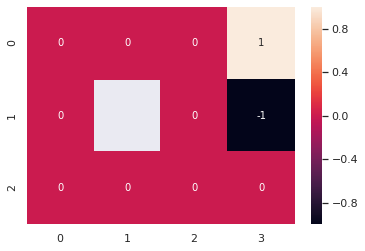

In [4]:
w=4
h=3
env=np.zeros((h,w),dtype=np.float64)
env[0,w-1]=1
env[1,w-1]=-1
env[1,1]=np.nan

nenv=env.copy()
base_env=env.copy()
sns.heatmap(nenv,annot=True)

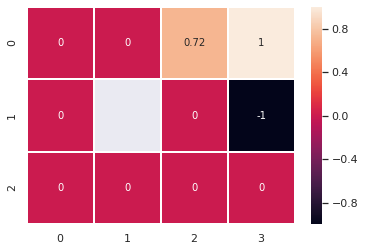

In [5]:
nenv=one_step(nenv,base_env)
sns.heatmap(nenv,annot=True,linewidth=1)

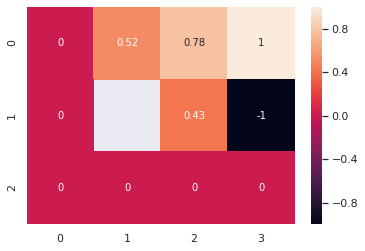

In [6]:
nenv=one_step(nenv,base_env)
sns.heatmap(nenv,annot=True)

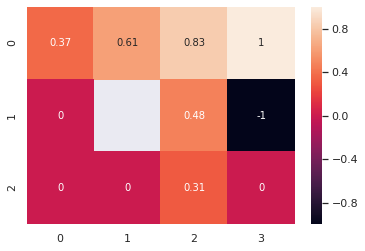

In [7]:
nenv=one_step(nenv,base_env)
sns.heatmap(nenv,annot=True)

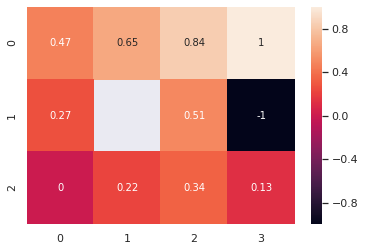

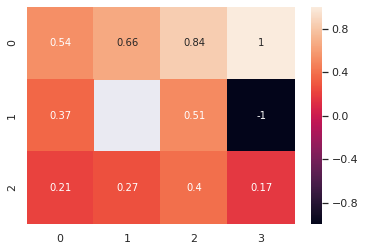

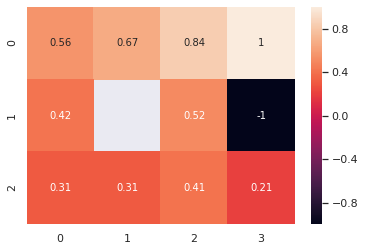

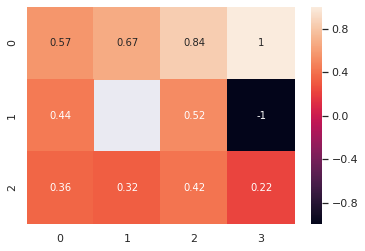

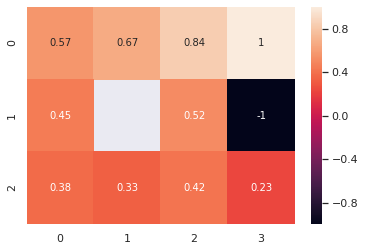

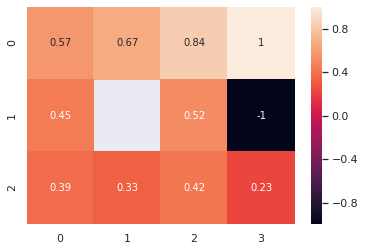

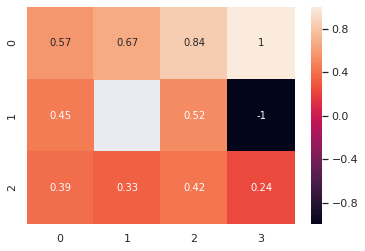

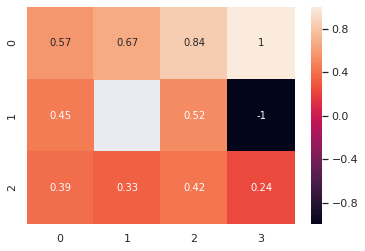

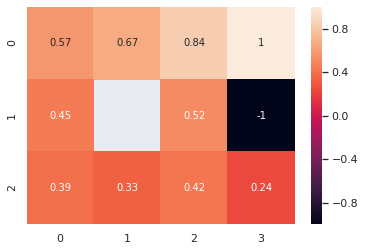

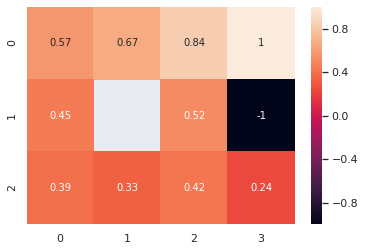

In [8]:
for i in range(10):
    #print('\nstep ...',i,'\n')
    nenv=one_step(nenv,base_env)
    sns.heatmap(nenv,annot=True)
    plt.show()